In [1]:
data_root = '../data/'

In [2]:
import pandas as pd


In [3]:
import seaborn as sns

In [4]:
raw_df = pd.read_excel(data_root+'raw_data.xlsx')
df = pd.read_excel(data_root+'extracted.xlsx')

In [5]:
raw_df.head()

,Unnamed: 0,email,ts,round,x,y,ix,iy
0,0,01094474828@naver.com,1548990076421,1,-1.0,-1.0,-1,-1
1,1,01094474828@naver.com,1548990084275,1,30.2,39.7,74,67
2,2,01094474828@naver.com,1548990084455,1,29.8,40.0,74,67
3,3,01094474828@naver.com,1548990095856,1,34.9,35.4,74,67
4,4,01094474828@naver.com,1548990096043,1,29.8,40.0,74,67


In [76]:
df.head()

,Unnamed: 0,alpha,avg_ccei,email,med_ccei,min_ccei,omega,rho,selected
0,0,0.809374,0.998411,01094474828@naver.com,0.980753,0.914301,0.128506,-0.358958,0
1,1,0.898992,0.980414,062woogwang@gmail.com,0.916396,0.574449,0.937243,2.819629,0
2,2,1.549390,0.996846,0718lhj@daum.net,0.960723,0.863205,0.006313,0.297705,0
3,3,1.000000,0.999955,12356778@naver.com,0.998352,0.994222,0.026652,-0.040149,0
4,4,1.000000,0.999272,1zzik@naver.com,0.995806,0.888774,0.122071,-0.172309,0


In [77]:
def scatter(df, you):
    selected = [0] * len(df)
    selected[you] = 1
    df['selected'] = selected
    new_df = pd.concat([df[df['selected'] == 0], df[df['selected'] == 1]])
    sns.scatterplot(data=new_df, x='alpha', y='rho', hue='selected')

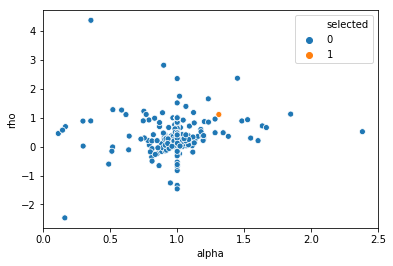

In [78]:
scatter(df, 40)

In [46]:
data = df[['alpha', 'rho']]

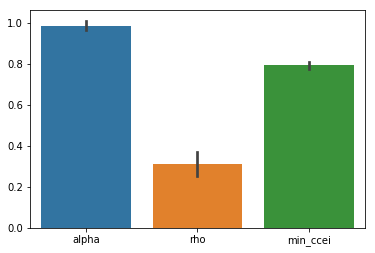

In [88]:
tmpdf = df[['alpha', 'rho', 'min_ccei']]
sns.barplot(data=tmpdf)
#sns.catplot(data=tmpdf.iloc[5], color='red')

In [89]:
from matplotlib import pyplot as plt

In [115]:
tmpdf['min_ccei'].describe()

count    312.000000
mean       0.791643
std        0.167208
min        0.160494
25%        0.685554
50%        0.837441
75%        0.921340
max        1.000000
Name: min_ccei, dtype: float64

(-3, 5)

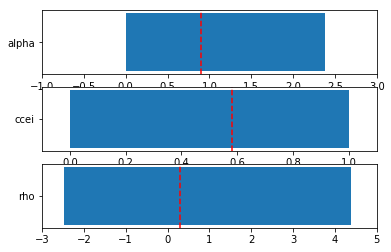

In [114]:
fig, ax = plt.subplots(3, 1)
ax[0].barh('alpha', tmpdf['alpha'])
ax[0].axvline(tmpdf.iloc[5]['alpha'], ls='--', color='r')
ax[0].set_xlim([-1, 3])
ax[1].barh('ccei', tmpdf['min_ccei'])
ax[1].axvline(tmpdf.iloc[5]['min_ccei'], ls='--', color='r')
ax[1].set_xlim([-0.1, 1.1])
ax[2].barh('rho', tmpdf['rho'])
ax[2].axvline(tmpdf.iloc[5]['rho'], ls='--', color='r')
ax[2].set_xlim([-3, 5])